In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

In [2]:
# Full of Dens
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss')<0.1:
            print("\nLoss if low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images/255
test_images_scaled = test_images/255

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5004 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3375 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3139 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2812 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2587 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2483 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [3]:
### CNN Convolutional Neural Network 卷积神经网络

'''
1. conv
2. maxpooling
'''
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss')<0.3:
            print("\nLoss if low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images/255
test_images_scaled = test_images/255

model = keras.Sequential([

    keras.layers.Conv2D(64, (3,3), activation ='relu', input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation ='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

model.compile(optimizer=tf.optimizers.Adam(), loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
model.fit(train_images.reshape(-1,28,28,1), train_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.4393 - accuracy: 0.8401
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8921
Loss if low so cancelling training!
1875/1875 [==============================] - 52s 27ms/step - loss: 0.2936 - accuracy: 0.8921


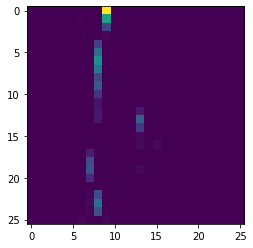

In [4]:
layers_out = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layers_out)

item_code = 2 # the number of item in test data
layer_num = 0 # the number of layers [0,3]
feature_num = 0 # the number of features [0,63]
pred = activation_model(test_images[item_code].reshape(1,28,28,1))
plt.imshow(pred[layer_num][0,:,:,feature_num])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               